### Required dependencies
You'll need recent versions of Jupyter (but if you're reading this, you are probably OK), scikit-learn, numpy, pandas, matplotlib and seaborn. The most recent versions should be fine. You are free to use any other package under the sun, but I suspect you will be at least needing the above.

I advise you to use a form of virtual environments to manage your python projects (e.g. venv, conda etc.).

To get free GPU time, you can try Google Colab. It is a tool for running notebooks like this on the fly, and provides you with a VM and a GPU for free. Almost all packages for machine learning are automatically installed, and I suspect you could do the entire project on Colab if you wanted to. Still, it is useful to learn how to set up your environment on your own pc as well, and Colab is a bit more complicated when you have to import your datasets (best to import/download them from a Google Drive for speed instead of uploading them from local machines). Colab could become useful if you intend to try the deep learning approaches with TensorFlow and PyTorch, and you don't have a GPU yourself.

In [24]:
# numerical library:
import numpy as np

# data manipulation library:
import pandas as pd

# standard packages used to handle files:
import sys
import os 
import glob
import time

# scikit-learn machine learning library:
import sklearn

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns

# tell matplotlib that we plot in a notebook:
%matplotlib notebook

Define your folder structure with your data:

In [2]:
data_folder = "./"

In [4]:
train_data = pd.read_csv(data_folder + "training_data.csv")
test_data = pd.read_csv(data_folder + "test_data.csv")

### Data exploration
Let's take a look at our train and test data:

In [7]:
train_data.head()

,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
0,801.22998,2013-01-01 00:00:00,-1.0,67.559998,286.00000,20.129999,7.52,7.76,7.64,286.19000,...,5.44,16.950001,26.049999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,943.16998,2013-01-01 00:10:00,-1.0,70.260002,286.00000,21.420000,8.18,8.45,8.31,288.32999,...,5.74,17.139999,26.100000,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,998.48999,2013-01-01 00:20:00,-1.0,75.330002,286.00000,22.049999,8.29,8.66,8.47,293.04001,...,6.09,17.150000,26.219999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,837.96002,2013-01-01 00:30:00,-1.0,82.739998,286.00000,22.299999,7.89,8.24,8.06,294.01999,...,6.35,16.910000,26.309999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,871.57001,2013-01-01 00:40:00,-1.0,82.349998,294.17999,22.600000,7.86,8.20,8.03,299.22000,...,6.51,16.920000,26.389999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


Let's take a look at our first 200 datapoints in the training set:

<IPython.core.display.Javascript object>


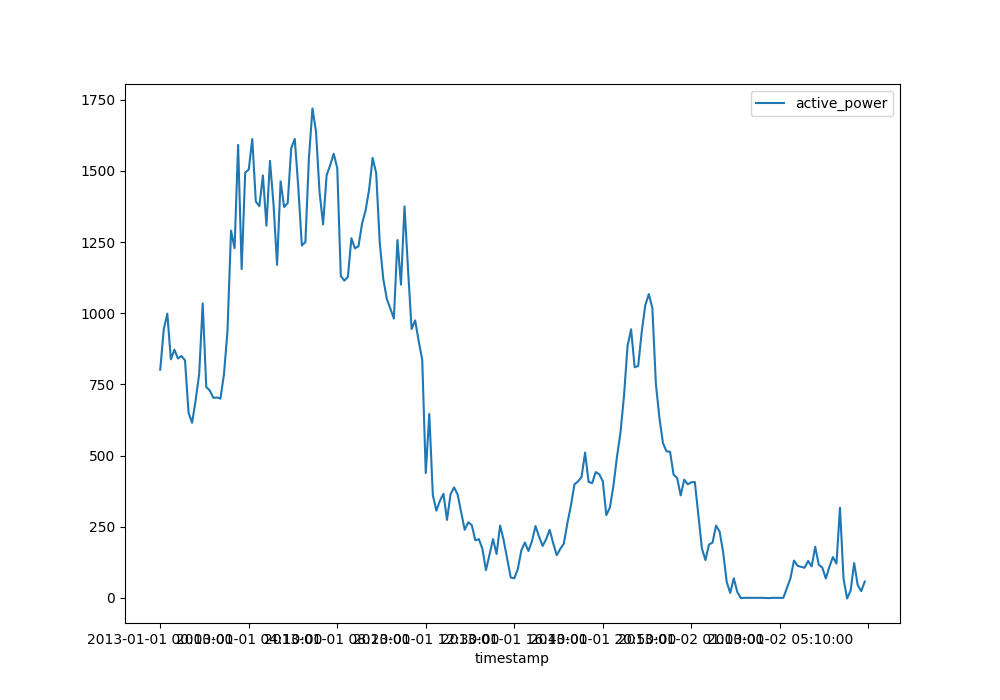

<AxesSubplot: xlabel='timestamp'>

In [8]:
train_data[0:200].plot(x="timestamp", y="active_power", figsize=(10,7))

In [9]:
test_data.head()

,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
0,2016-12-31 04:20:00,0.50,2.07,185.73,16.370001,1.61,3.50,2.56,199.31000,13.660000,3.75,9.229999,17.230000,-5.06,1034.0,93.0,1.03,0.0,0.0,0.0
1,2016-12-31 04:30:00,0.21,2.77,185.73,16.790001,2.09,3.59,2.84,194.61000,8.850000,3.80,9.229999,17.379999,-5.06,1034.0,93.0,1.03,0.0,0.0,0.0
2,2016-12-31 04:40:00,0.50,5.84,185.73,17.209999,1.08,3.34,2.21,192.75000,6.970000,3.90,9.229999,17.549999,-5.06,1034.0,93.0,1.03,0.0,0.0,0.0
3,2016-12-31 04:50:00,0.50,6.25,185.73,17.480000,0.91,3.45,2.18,180.42999,-5.360000,3.80,9.229999,17.680000,-5.06,1034.0,93.0,1.03,0.0,0.0,0.0
4,2016-12-31 05:00:00,0.27,2.57,185.73,17.809999,2.00,3.51,2.75,168.67999,-17.049999,3.54,9.229999,17.830000,-5.49,1034.0,93.0,0.51,0.0,0.0,0.0


### Building a first submission

For a first submission, let's just take the average consumption for the power output of the training set, and use this value for all test samples:

In [14]:
avg_power = train_data["active_power"].mean()
print(average_count)

333.8160387302769


Let's put this in a numpy array with length of our test dataset. For the assignment, 'predictions' will be the output of your machine learning models, instead of just creating this average guess:

Create a unique filename based on timestamp:

In [18]:
def generate_unique_filename(basename, file_ext):
    """Adds a timestamp to filenames for easier tracking of submissions, models, etc."""
    timestamp = time.strftime("%Y%m%d-%H%M%S", time.localtime())
    return basename + '_' + timestamp + '.' + file_ext

Let's create our pandas dataframe and write it to csv. You can submit this file to Kaggle.

In [19]:
submission = pd.DataFrame(data=predictions, columns=["active_power"])
submission.reset_index(inplace=True)
submission = submission.rename(columns = {'index':'id'})
submission.head()

,id,active_power
0,0,333.816039
1,1,333.816039
2,2,333.816039
3,3,333.816039
4,4,333.816039


In [20]:
submission.to_csv(generate_unique_filename("average_submission", "csv"), index=False)

This submission will get a (bad) MAE score of about 336.

### Let's try something a bit more fancy:

I will use the manufacturer windspeed-power curve that I obtained by googling the wind turbine model, in order to create a better (non machine learning) model. For wind turbines, the relationship between the wind speed and the power output is the most important one for performance metrics (but of course is influenced by all other features as well).

In [26]:
# speed-power curve from wind turbine manual:
theo_speeds = np.arange(0, 22.5, 0.5)
theo_powers = [0, 0, 0, 0, 0, 0, 0, 0, 55, 110, 186, 264, 342, 424, 506, 618, 730, 865, 999, 1195, 1391, 1558, 1724, 1828, 1909, 1960, 2002, 2025, 2044,
               2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050]

<IPython.core.display.Javascript object>


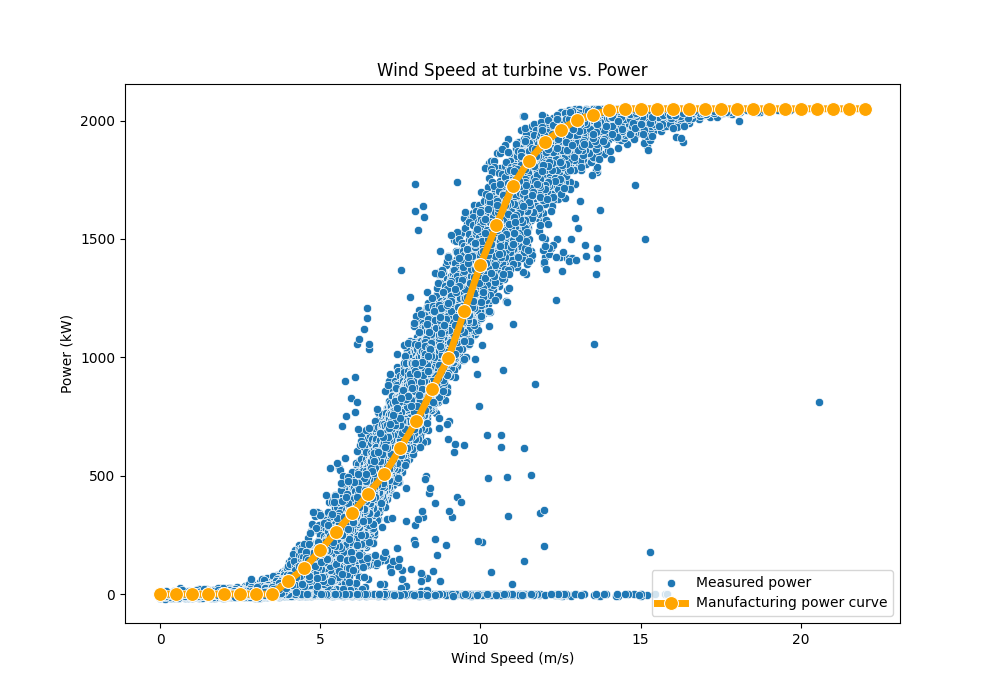

In [28]:
# Create a scatter plot of wind speed vs. power
plt.figure(figsize=(10, 7))
sns.scatterplot(x='wind_speed_avg', y='active_power', data=train_data)
sns.lineplot(x=theo_speeds, y=theo_powers, marker=".", markersize=20, linewidth=5, c="orange")
plt.title('Wind Speed at turbine vs. Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.legend(loc="lower right", labels=["Measured power", "Manufacturing power curve"])
plt.show()

We can see that this theoretical curve already will do much better than just taking the average. But there is still much room for improvement! This will be the task of your machine learning models. Let's create predictions based on this theoretical curve and submit them to Kaggle:

In [31]:
# a function for binning the wind speeds into 0, 0.5, 1, ... just like the theoretical manufacturer curve:
def mean_speed(x):
    for i in np.arange(0.25, 25, 0.5):
        if x < i:
            x = i - 0.25
            return x

# apply the binning to our test data:
test_data["mean_wind_speed"] = test_data["wind_speed_avg"].apply(mean_speed)

In [32]:
prediction_theo = np.zeros(test_data.shape[0])
for i in test_data["mean_wind_speed"].index:
    prediction_theo[i] += theo_powers[int(test_data["mean_wind_speed"][i]*2)]  # * 2 is because theo curve is per 0.5

In [36]:
submission_theo = pd.DataFrame(data=prediction_theo, columns=["active_power"])
submission_theo.reset_index(inplace=True)
submission_theo = submission_theo.rename(columns = {'index':'id'})
submission_theo.head()

,id,active_power
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [40]:
submission_theo.to_csv(generate_unique_filename("manufacturer_curve_submission", "csv"), index=False)

This submission will get a better MAE score of about 57. Of course, this was based on the manufacturing curve, which is clearly not perfectly aligned with the actual data we have. The real data does provide more accurate measurements, so it is important we use it. Moreover, we are basically just using one feature here (wind speed), while we have many other features which our machine learning models can take into account to improve the predictions. If real life applications that need to predict wind turbine power output only use the (general) manufacturer power curve, they are leaving much improvements on the table. Each turbine is different, so one curve can hardly fit all, and other variables influence the power output at specific times as well.